# Exploratory Data Analysis for Flood Prediction Dataset (Kaggle)

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data_path = os.path.join("datasets", "floods_bangladesh.csv")
floods = pd.read_csv(data_path, skiprows=1)
# Define the column names
floods.columns = ['Station_Index', 'Station_Name', 'Year', 'Month', 'Max_Temp', 
                  'Min_Temp', 'Monthly_Rainfall', 'Relative_Humidity', 'Wind_Speed',
                  'Cloud_Coverage', 'Hours_of_Sunshine', 'Station_Number',
                  'X_Coord', 'Y_Coord', 'Latitude', 'Longitude', 'Altitude',
                  'Year_Month', 'Flood']

floods['Flood'] = floods['Flood'].fillna(0)
floods.head()

,Station_Index,Station_Name,Year,Month,Max_Temp,Min_Temp,Monthly_Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Hours_of_Sunshine,Station_Number,X_Coord,Y_Coord,Latitude,Longitude,Altitude,Year_Month,Flood
0,1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,0.0
1,2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,0.0
2,3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,0.0
3,4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,0.0
4,5,Barisal,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1949.06,1.0


### Column information:
- SI: Station Index
- Station: Weather Station
- Year: year of event

In [4]:
# Info and Shape
print(floods.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20543 entries, 0 to 20542
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Station_Index      20543 non-null  int64  
 1   Station_Name       20543 non-null  object 
 2   Year               20543 non-null  int64  
 3   Month              20543 non-null  int64  
 4   Max_Temp           20543 non-null  float64
 5   Min_Temp           20543 non-null  float64
 6   Monthly_Rainfall   20543 non-null  float64
 7   Relative_Humidity  20543 non-null  float64
 8   Wind_Speed         20543 non-null  float64
 9   Cloud_Coverage     20543 non-null  float64
 10  Hours_of_Sunshine  20543 non-null  float64
 11  Station_Number     20543 non-null  int64  
 12  X_Coord            20543 non-null  float64
 13  Y_Coord            20543 non-null  float64
 14  Latitude           20543 non-null  float64
 15  Longitude          20543 non-null  float64
 16  Altitude           205

In [5]:
floods.describe().T

,count,mean,std,min,25%,50%,75%,max
Station_Index,20543.0,10272.000000,5930.397626,1.00,5136.500000,10272.00,15407.500,20543.00
Year,20543.0,1985.334713,17.609403,1948.00,1972.000000,1987.00,2000.000,2013.00
Month,20543.0,6.500268,3.452007,1.00,4.000000,7.00,9.500,12.00
Max_Temp,20543.0,33.450936,2.956337,21.60,31.700000,33.90,35.400,44.00
Min_Temp,20543.0,21.167303,4.949320,6.20,16.900000,23.40,25.400,28.10
Monthly_Rainfall,20543.0,198.786297,240.695060,0.00,8.000000,111.00,312.000,2072.00
Relative_Humidity,20543.0,79.497935,7.667692,34.00,75.000000,81.00,85.000,97.00
Wind_Speed,20543.0,1.415096,1.042457,0.00,0.700000,1.20,1.900,11.20
Cloud_Coverage,20543.0,3.485967,2.083744,0.00,1.600000,3.30,5.500,7.90
Hours_of_Sunshine,20543.0,6.418987,1.747973,0.00,4.965517,6.80,7.800,11.00


Flood
0.0    16411
1.0     4132
Name: count, dtype: int64


<Axes: xlabel='Flood', ylabel='count'>

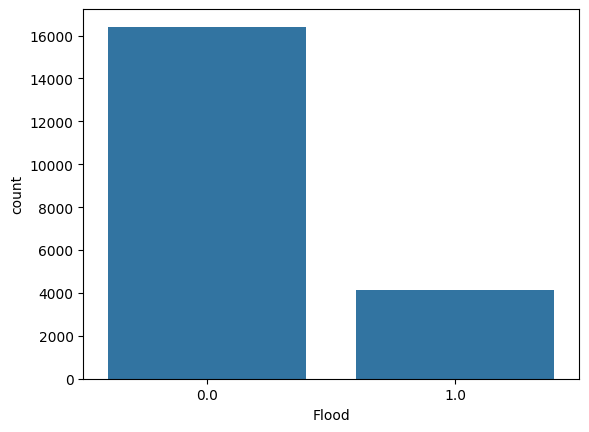

In [6]:
# Check dataset balance
print(floods['Flood'].value_counts())
sns.countplot(x='Flood', data=floods)

<Axes: >

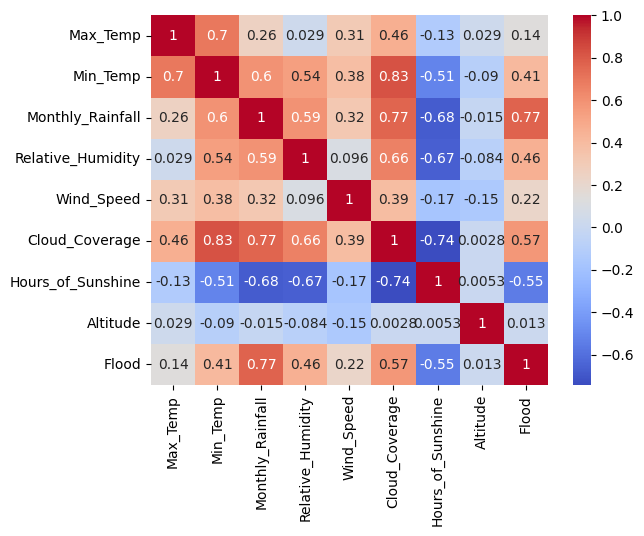

In [7]:
# Define the important data columns
num_cols = ['Max_Temp', 'Min_Temp', 'Monthly_Rainfall', 'Relative_Humidity', 'Wind_Speed',
            'Cloud_Coverage', 'Hours_of_Sunshine', 'Altitude', 'Flood']

# Visualize the correlation matrix
corr = floods[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [8]:
def test_current_dataset(X,y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))

# Without Altitude
print("Testing without Altitude:")
X = floods[num_cols].drop(['Flood', 'Altitude'], axis=1)
y = floods['Flood']
test_current_dataset(X, y, LogisticRegression())

# With Altitude
print("\nTesting with Altitude:")
X = floods[num_cols].drop('Flood', axis=1)
y = floods['Flood']
test_current_dataset(X, y, LogisticRegression())

Testing without Altitude:
[[3200   79]
 [ 128  702]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      3279
         1.0       0.90      0.85      0.87       830

    accuracy                           0.95      4109
   macro avg       0.93      0.91      0.92      4109
weighted avg       0.95      0.95      0.95      4109

Accuracy:  0.949622779265028
F1 Score:  0.8715083798882681

Testing with Altitude:
[[3191   88]
 [ 134  696]]
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      3279
         1.0       0.89      0.84      0.86       830

    accuracy                           0.95      4109
   macro avg       0.92      0.91      0.91      4109
weighted avg       0.95      0.95      0.95      4109

Accuracy:  0.9459722560233633
F1 Score:  0.862453531598513


In [9]:
# Gathering DEM data
lat_lons = floods[['Station_Name','Latitude', 'Longitude']].drop_duplicates().reset_index(drop=True)

import ee
import pandas as pd

# Initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='ml-flood-prediction')

# Define a feature collection
points = ee.FeatureCollection([
    ee.Feature(
        ee.Geometry.Point(lon, lat), 
        {'Station_Name': station}
        )
    for station, lat, lon in zip(lat_lons['Station_Name'], lat_lons['Latitude'], lat_lons['Longitude'])
])

In [10]:
# ---- Adding Land Cover Information ---- #

# ESA WorldCover dataset
collection = ee.ImageCollection("ESA/WorldCover/v200")
landcover_2021 = collection.filter(ee.Filter.eq("system:index", "2021")).first()

if landcover_2021 is None:
    raise ValueError("Could not load WorldCover image for 2021!")

# Sample land cover at each station location
lc_samples = landcover_2021.sampleRegions(
    collection=points,
    scale=10,            # WorldCover is 10 m resolution
    geometries=True      # Keep coordinates in output
)

# Convert result to a Python dictionary
lc_dict = lc_samples.getInfo()

# Extract rows: each row is Feature -> properties
rows = []
for feature in lc_dict['features']:
    props = feature['properties']
    rows.append({
        "Station_Name": props['Station_Name'],
        "LC_Class": props['Map'],      # Landcover class code (10,20,30,...)
    })

df_landcover = pd.DataFrame(rows)
lc_labels = {
    10: "Tree cover",
    20: "Shrubland",
    30: "Grassland",
    40: "Cropland",
    50: "Built-up",
    60: "Bare/Sparse vegetation",
    70: "Snow/Ice",
    80: "Permanent water bodies",
    90: "Herbaceous wetland",
    95: "Mangroves",
    100: "Moss & lichen"
}
df_landcover["LC_Label"] = df_landcover["LC_Class"].map(lc_labels)
print(df_landcover)

                 Station_Name  LC_Class                LC_Label
0                     Barisal        50                Built-up
1                       Bhola        40                Cropland
2                       Bogra        40                Cropland
3                    Chandpur        10              Tree cover
4   Chittagong (City-Ambagan)        50                Built-up
5    Chittagong (IAP-Patenga)        50                Built-up
6                     Comilla        10              Tree cover
7                 Cox's Bazar        80  Permanent water bodies
8                       Dhaka        10              Tree cover
9                    Dinajpur        40                Cropland
10                   Faridpur        10              Tree cover
11                       Feni        50                Built-up
12                     Hatiya        10              Tree cover
13                    Ishurdi        10              Tree cover
14                    Jessore        50 

In [11]:
# ---- Elevation and Slope ---- #

# Load SRTM DEM
srtm = ee.Image("USGS/SRTMGL1_003")

# Derive slope in degrees
slope = ee.Terrain.slope(srtm)

elev_slope = srtm.addBands(slope).sampleRegions(
    collection=points,
    scale=30,
    geometries=False
)

elev_slope_dict = elev_slope.getInfo()

rows = []
for f in elev_slope_dict['features']:
    p = f['properties']
    rows.append({
        "Station_Name": p['Station_Name'],
        "Elevation_m": p['elevation'],
        "Slope_deg": p['slope']
    })

df_elev_slope = pd.DataFrame(rows)
print(df_elev_slope)

                 Station_Name  Elevation_m  Slope_deg
0                     Barisal            9   2.108958
1                       Bhola           -1   0.927410
2                       Bogra           19   2.758659
3                    Chandpur           13   4.892058
4   Chittagong (City-Ambagan)           36   2.955047
5    Chittagong (IAP-Patenga)            7   2.780288
6                     Comilla           15   3.839551
7                 Cox's Bazar           -2   4.085859
8                       Dhaka           15   2.228067
9                    Dinajpur           36   4.954909
10                   Faridpur           11   0.927410
11                       Feni           10   2.217402
12                     Hatiya            5   3.004425
13                    Ishurdi           17   1.016109
14                    Jessore           12   1.370157
15                  Khepupara           10   0.927410
16                     Khulna            5   1.006001
17                   Kutubdi

In [12]:
# ---- Distance From Nearest Streams ---- #

# HydroSHEDS river lines
rivers = ee.FeatureCollection("WWF/HydroSHEDS/v1/FreeFlowingRivers")

# Turn rivers into raster: 1 where river exists
river_raster = rivers.reduceToImage(
    properties=['LENGTH'], 
    reducer=ee.Reducer.first()
).gt(0)

# Compute Euclidean distance
distance_to_river = river_raster.fastDistanceTransform(30).sqrt().multiply(30)

river_dist = distance_to_river.sampleRegions(
    collection=points,
    scale=30,
    geometries=False
)

river_dist_dict = river_dist.getInfo()
print(river_dist_dict)

rows = []
for f in river_dist_dict['features']:
    p = f['properties']
    rows.append({
        "Station_Name": p['Station_Name'],
        "Dist_to_River_m": p['distance']  # distance in meters
    })

df_river_dist = pd.DataFrame(rows)
print(df_river_dist)

{'type': 'FeatureCollection', 'columns': {}, 'properties': {'band_order': ['distance']}, 'features': [{'type': 'Feature', 'geometry': None, 'id': '0_0', 'properties': {'Station_Name': 'Barisal', 'distance': 1390228.5000315595}}, {'type': 'Feature', 'geometry': None, 'id': '1_0', 'properties': {'Station_Name': 'Bhola', 'distance': 1390228.5000315595}}, {'type': 'Feature', 'geometry': None, 'id': '2_0', 'properties': {'Station_Name': 'Bogra', 'distance': 1390228.5000315595}}, {'type': 'Feature', 'geometry': None, 'id': '3_0', 'properties': {'Station_Name': 'Chandpur', 'distance': 1390228.5000315595}}, {'type': 'Feature', 'geometry': None, 'id': '4_0', 'properties': {'Station_Name': 'Chittagong (City-Ambagan)', 'distance': 1390228.5000315595}}, {'type': 'Feature', 'geometry': None, 'id': '5_0', 'properties': {'Station_Name': 'Chittagong (IAP-Patenga)', 'distance': 1390228.5000315595}}, {'type': 'Feature', 'geometry': None, 'id': '6_0', 'properties': {'Station_Name': 'Comilla', 'distance':

In [13]:
env_df = (df_landcover.merge(df_elev_slope, on="Station_Name", how="left")
                .merge(df_elev_slope, on="Station_Name", how="left"))

env_floods = floods.merge(env_df, on="Station_Name", how="left")
env_floods = pd.get_dummies(env_floods, columns=['LC_Label'], prefix='', prefix_sep='', dtype=int)
print(env_floods.head(10))

print("Testing with Environmental data:")
X = env_floods[num_cols].drop(['Flood', 'Altitude'], axis=1)
y = env_floods['Flood']
test_current_dataset(X, y, LogisticRegression())


   Station_Index Station_Name  Year  Month  Max_Temp  Min_Temp  \
0              1      Barisal  1949      2      33.9      15.2   
1              2      Barisal  1949      3      36.7      20.2   
2              3      Barisal  1949      4      33.9      23.9   
3              4      Barisal  1949      5      35.6      25.0   
4              5      Barisal  1949      6      34.4      25.7   
5              6      Barisal  1949      7      33.4      25.8   
6              7      Barisal  1949      8      33.5      25.7   
7              8      Barisal  1949      9      34.8      25.7   
8              9      Barisal  1949     10      34.0      24.7   
9             10      Barisal  1949     11      31.5      17.4   

   Monthly_Rainfall  Relative_Humidity  Wind_Speed  Cloud_Coverage  ...  \
0               9.0               63.0    0.659259             0.9  ...   
1               8.0               59.0    1.085185             1.5  ...   
2             140.0               71.0    1.7722

Epoch 10, Loss: 0.1452
Epoch 20, Loss: 0.1649
Epoch 30, Loss: 0.1403
Epoch 40, Loss: 0.1730
Epoch 50, Loss: 0.1433


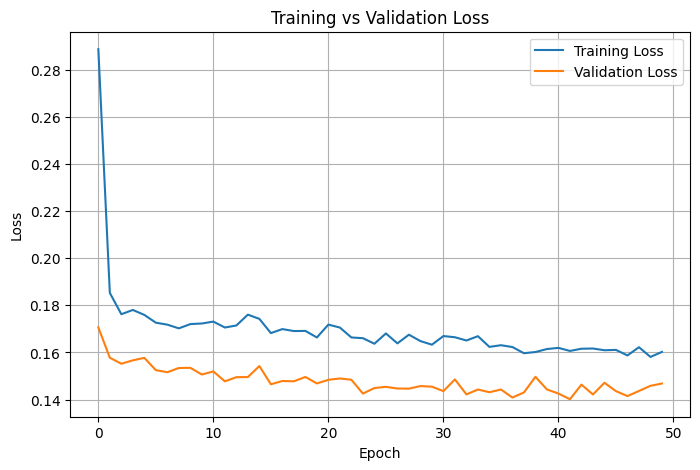

In [20]:
import torch
import torch.nn as nn
from FloodMLP import FloodMLP
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_losses_vs_epoch(train_losses, val_losses):
    plt.figure(figsize=(8,5))
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

#def eval_performance(y_true, y_pred):

# def add_test_results(model, test_csv_path, num_epochs, ):
#     df_new_res = pd.DataFrame({
#         'num_epochs' : num_epochs,
#         ''
#     })

#     if not os.path.exists(train_csv_path):
#         df_res = pd.DataFrame()
#     else:
#         df_res = pd.read_csv(train_csv_path)

# Split into 80% train and 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X.values, y.values, test_size=0.20, random_state=42, stratify=y
)

# From train_val, take 12.5% for validation → 0.8 * 0.125 = 0.10 of full data
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.125, random_state=42, stratify=y_train_val
)

# Convert to torch tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)

X_val_t = torch.tensor(X_val, dtype=torch.float32)
y_val_t = torch.tensor(y_val.reshape(-1, 1), dtype=torch.float32)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

# DataLoaders
train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=64, shuffle=True)
val_loader   = DataLoader(TensorDataset(X_val_t, y_val_t), batch_size=64, shuffle=False)

# Initialize model, optimizer, and loss criterion
model = FloodMLP(input_size=X.shape[1], dropout=0.2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

# Training and Validation Loop
train_losses = []
val_losses = []

for epoch in range(50):
    # Training
    model.train()
    epoch_train_loss = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        epoch_train_loss+=loss.item()

    # Validation
    model.eval()
    epoch_val_loss = 0.0
    with torch.no_grad():
        for xb, yb in val_loader:
            val_preds = model(xb)
            val_loss = criterion(val_preds, yb)
            epoch_val_loss += val_loss.item()

    # Average losses
    avg_train_loss = epoch_train_loss / len(train_loader)
    avg_val_loss   = epoch_val_loss / len(val_loader)

    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

    if ((epoch+1) % 10 == 0):
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

plot_losses_vs_epoch(train_losses, val_losses)

In [21]:
# Testing
test_loader = DataLoader(TensorDataset(X_test_t, y_test_t))

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for xb, yb in test_loader:
        outputs = model(xb)
        probs = outputs.squeeze(dim=1)              # shape → (batch,)
        preds = (probs >= 0.5).long()               # threshold at 0.5
        all_preds.extend(preds.numpy())
        all_labels.extend(yb.numpy())

accuracy = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds, average='weighted')

print("\n===== TEST RESULTS =====")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(all_labels, all_preds))
print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))


===== TEST RESULTS =====
Accuracy: 0.9448
F1 Score: 0.9436

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      3283
         1.0       0.91      0.81      0.85       826

    accuracy                           0.94      4109
   macro avg       0.93      0.89      0.91      4109
weighted avg       0.94      0.94      0.94      4109

Confusion Matrix:
[[3214   69]
 [ 158  668]]
